In [1]:

import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
tf.__version__

'2.1.0'

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

print(X_train_full.shape)
X_train_full.dtype


Lets scale the image.Scaling pixel density to 0-1 
And also, lets divide into dev set

In [3]:
X_valid,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

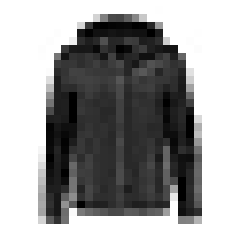

In [4]:
plt.imshow(X_train[0],cmap='binary')
plt.axis('off')
plt.show()

Here are the corresponding class names:

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

Lets loook at some samples

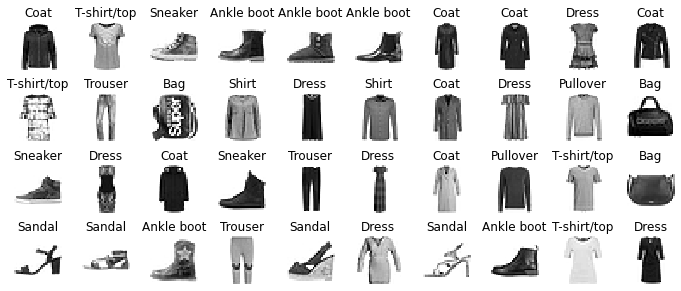

In [6]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Now let’s build the neural network! Here is a classification MLP with two hidden layers:

model = keras.models.Sequential()  
<!-- # The first line creates a Sequential model. This is the simplest kind of Keras model, for neural networks that are just composed of a single stack of layers, connected sequentially -->
model.add(keras.layers.Flatten(input_shape-[28,28]))  #preprocessing
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [5]:
model = keras.models.Sequential()  
# The first line creates a Sequential model. This is the simplest kind of Keras
# model, for neural networks that are just composed of a single stack of layers, connected
# sequentially. This is called the sequential API.
model.add(keras.layers.Flatten(input_shape=[28, 28])) #if you know the input shape when creating the model, it is best to specify it.
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [1]:
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please ensure you have installed TensorFlow correctly')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 2.1.0
Default GPU Device: /device:GPU:0


Instead of adding the layers one by one as we just did, you can pass a list of layers
when creating the Sequential model:

In [8]:
# model = keras.models.Sequential([
# keras.layers.Flatten(input_shape=[28, 28]),
# keras.layers.Dense(300, activation="relu"),
# keras.layers.Dense(100, activation="relu"),
# keras.layers.Dense(10, activation="softmax")
# ])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.layers

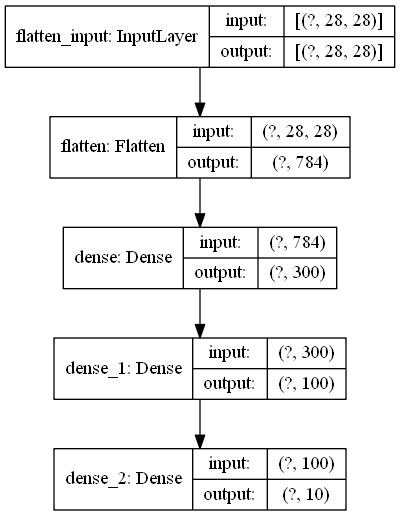

In [11]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [12]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [13]:
weights,biases=hidden1.get_weights()

In [14]:
weights.shape

(784, 300)

In [15]:
biases.shape


(300,)

Here weights are initialized randomly.If you ever want to use a different initialization method,
you can set kernel_initializer (kernel is another name for the matrix of connection
weights) or bias_initializer when creating the layer. We will discuss initializers
further in Chapter 11, but if you want the full list, see https://keras.io/initializers/.

After a model is created, you must call its compile() method to specify the loss function
and the optimizer to use.

In [7]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"]
)

We will use many other losses, optimizers and metrics
in this book, but for the full lists see https://keras.io/losses/,
https://keras.io/optimizers/ and https://keras.io/metrics/.

In [9]:
y_train.shape

(55000,)

Training the model
Instead of passing a validation set using the validation_data
argument, you could instead set validation_split to the ratio of
the training set that you want Keras to use for validation (e.g., 0.1).

In [8]:
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 75us/sample - loss: 0.7265 - accuracy: 0.7606 - val_loss: 0.5397 - val_accuracy: 0.8116
Epoch 2/30
55000/55000 [==============================] - 4s 66us/sample - loss: 0.4928 - accuracy: 0.8283 - val_loss: 0.4791 - val_accuracy: 0.8352
Epoch 3/30
55000/55000 [==============================] - 4s 65us/sample - loss: 0.4478 - accuracy: 0.8424 - val_loss: 0.4236 - val_accuracy: 0.8574
Epoch 4/30
55000/55000 [==============================] - 4s 66us/sample - loss: 0.4207 - accuracy: 0.8525 - val_loss: 0.3996 - val_accuracy: 0.8632
Epoch 5/30
55000/55000 [==============================] - 4s 64us/sample - loss: 0.4002 - accuracy: 0.8599 - val_loss: 0.3791 - val_accuracy: 0.8694
Epoch 6/30
55000/55000 [==============================] - 4s 65us/sample - loss: 0.3841 - accuracy: 0.8642 - val_loss: 0.3789 - val_accuracy: 0.8704
Epoch 7/30
55000/55000 [==============================] -

In [20]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [9]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# What version of Python do you have?
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Tensor Flow Version: 2.1.0
Keras Version: 2.2.4-tf

Python 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]
Pandas 1.0.5
Scikit-Learn 0.23.1
GPU is available


In [11]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [21]:
history.history

{'loss': [0.7171912496826865,
  0.48929091508171774,
  0.4431244108850306,
  0.4176416869943792,
  0.39674023571014405,
  0.37819316016110505,
  0.36491142221797596,
  0.35385579057606786,
  0.34284581028548156,
  0.3329388085950505,
  0.32533218797770413,
  0.317224543521621,
  0.3101986647714268,
  0.30291498747738926,
  0.29597526544224134,
  0.2909465825969523,
  0.2849257104808634,
  0.2781197386373173,
  0.2741136682662097,
  0.26832330722375347,
  0.2638388521866365,
  0.2581643642967398,
  0.25415041582150893,
  0.24947205317020416,
  0.24589436495737596,
  0.24217737305381082,
  0.23739773765043778,
  0.23354536280632018,
  0.2288332750244574,
  0.22645488857789473],
 'accuracy': [0.7647455,
  0.82856363,
  0.8445455,
  0.85243636,
  0.8592727,
  0.86596364,
  0.8712,
  0.87421817,
  0.87805456,
  0.8812,
  0.88354546,
  0.88567275,
  0.88954544,
  0.8917091,
  0.89394546,
  0.8955455,
  0.8967091,
  0.8994727,
  0.9008727,
  0.90336365,
  0.9046364,
  0.90763634,
  0.9092909,

In [22]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

Lets plot error!!

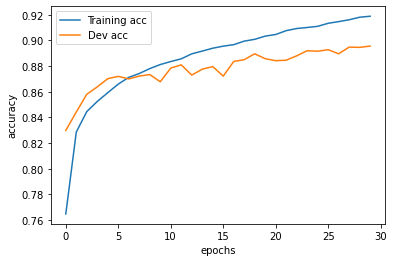

In [23]:
plt.plot(history.epoch,history.history['accuracy'],label='Training acc')
plt.plot(history.epoch,history.history['val_accuracy'],label='Dev acc')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

another plot! (from book)

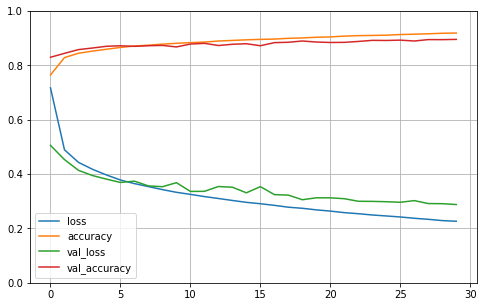

In [24]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Lets evaluate on test set

In [25]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 34us/sample - loss: 63.5172 - accuracy: 0.8448


[63.51722314302921, 0.8448]

clearly overfits. needs hyperparam tunning

Using the model to make predictions

In [26]:
X_new=X_test[:3]
y_proba=model.predict(X_new)
print(y_proba.round(2))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [31]:
import numpy as np
y_pred=model.predict_classes(X_new)
print(y_pred)
print('predictions:',np.array(class_names)[y_pred])
y_new=y_test[:3]
print(y_new)
print('real:',np.array(class_names)[y_new])

[9 2 1]
predictions: ['Ankle boot' 'Pullover' 'Trouser']
[9 2 1]
real: ['Ankle boot' 'Pullover' 'Trouser']
